In [1]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve
from sklearn import metrics
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# this is for logistic Regression
from sklearn.linear_model import LogisticRegression

# this is for decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


# Fetch Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/stay-fcsd/data-final-project/main/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Hot Encoding
Convert categorical features into dummy columns in the feature table with a binary value for each of the possible categorical values

In [3]:
hot_encoded_df = df.copy()

gender_column = df[["Sex"]]

hot_encoded_df['Male'] = gender_column
hot_encoded_df['Female'] = gender_column

hot_encoded_df = hot_encoded_df.drop('Sex', 1)

chest_pain_type_column = df[["ChestPainType"]]
hot_encoded_df['ATA'] = chest_pain_type_column
hot_encoded_df['TA'] = chest_pain_type_column
hot_encoded_df['ASY'] = chest_pain_type_column
hot_encoded_df['NAP'] = chest_pain_type_column
hot_encoded_df = hot_encoded_df.drop('ChestPainType', 1)

resting_ECG_column = df[["RestingECG"]]
hot_encoded_df['Normal'] = resting_ECG_column
hot_encoded_df['ST'] = resting_ECG_column
hot_encoded_df['LVH'] = resting_ECG_column
hot_encoded_df = hot_encoded_df.drop('RestingECG', 1)

ST_slope_column = df[["ST_Slope"]]

hot_encoded_df['Up'] = ST_slope_column
hot_encoded_df['Flat'] = ST_slope_column
hot_encoded_df['Down'] = ST_slope_column

hot_encoded_df = hot_encoded_df.drop('ST_Slope', 1)

hot_encoded_df['Male'] = hot_encoded_df['Male'].replace(['M'], '1')
hot_encoded_df['Male'] = hot_encoded_df['Male'].replace(['F'], '0')

hot_encoded_df['Female'] = hot_encoded_df['Female'].replace(['M'], '0')
hot_encoded_df['Female'] = hot_encoded_df['Female'].replace(['F'], '1')

hot_encoded_df['ATA'] = hot_encoded_df['ATA'].replace(['ATA'], '1')
hot_encoded_df['ATA'] = hot_encoded_df['ATA'].replace(['TA'], '0')
hot_encoded_df['ATA'] = hot_encoded_df['ATA'].replace(['ASY'], '0')
hot_encoded_df['ATA'] = hot_encoded_df['ATA'].replace(['NAP'], '0')

hot_encoded_df['TA'] = hot_encoded_df['TA'].replace(['ATA'], '0')
hot_encoded_df['TA'] = hot_encoded_df['TA'].replace(['TA'], '1')
hot_encoded_df['TA'] = hot_encoded_df['TA'].replace(['ASY'], '0')
hot_encoded_df['TA'] = hot_encoded_df['TA'].replace(['NAP'], '0')

hot_encoded_df['ASY'] = hot_encoded_df['ASY'].replace(['ATA'], '0')
hot_encoded_df['ASY'] = hot_encoded_df['ASY'].replace(['TA'], '0')
hot_encoded_df['ASY'] = hot_encoded_df['ASY'].replace(['ASY'], '1')
hot_encoded_df['ASY'] = hot_encoded_df['ASY'].replace(['NAP'], '0')

hot_encoded_df['NAP'] = hot_encoded_df['NAP'].replace(['ATA'], '0')
hot_encoded_df['NAP'] = hot_encoded_df['NAP'].replace(['TA'], '0')
hot_encoded_df['NAP'] = hot_encoded_df['NAP'].replace(['ASY'], '0')
hot_encoded_df['NAP'] = hot_encoded_df['NAP'].replace(['NAP'], '1')

hot_encoded_df['Normal'] = hot_encoded_df['Normal'].replace(['Normal'], '1')
hot_encoded_df['Normal'] = hot_encoded_df['Normal'].replace(['ST'], '0')
hot_encoded_df['Normal'] = hot_encoded_df['Normal'].replace(['LVH'], '0')

hot_encoded_df['ST'] = hot_encoded_df['ST'].replace(['Normal'], '0')
hot_encoded_df['ST'] = hot_encoded_df['ST'].replace(['ST'], '1')
hot_encoded_df['ST'] = hot_encoded_df['ST'].replace(['LVH'], '0')

hot_encoded_df['LVH'] = hot_encoded_df['LVH'].replace(['Normal'], '0')
hot_encoded_df['LVH'] = hot_encoded_df['LVH'].replace(['ST'], '0')
hot_encoded_df['LVH'] = hot_encoded_df['LVH'].replace(['LVH'], '1')

hot_encoded_df['Up'] = hot_encoded_df['Up'].replace(['Up'], '1')
hot_encoded_df['Up'] = hot_encoded_df['Up'].replace(['Flat'], '0')
hot_encoded_df['Up'] = hot_encoded_df['Up'].replace(['Down'], '0')

hot_encoded_df['Flat'] = hot_encoded_df['Flat'].replace(['Up'], '0')
hot_encoded_df['Flat'] = hot_encoded_df['Flat'].replace(['Flat'], '1')
hot_encoded_df['Flat'] = hot_encoded_df['Flat'].replace(['Down'], '0')

hot_encoded_df['Down'] = hot_encoded_df['Down'].replace(['Up'], '0')
hot_encoded_df['Down'] = hot_encoded_df['Down'].replace(['Flat'], '0')
hot_encoded_df['Down'] = hot_encoded_df['Down'].replace(['Down'], '1')

hot_encoded_df['ExerciseAngina'] = hot_encoded_df['ExerciseAngina'].replace(['Y'], '1')
hot_encoded_df['ExerciseAngina'] = hot_encoded_df['ExerciseAngina'].replace(['N'], '0')

heart_disease_column = hot_encoded_df.pop('HeartDisease')
hot_encoded_df.insert(19, 'HeartDisease', heart_disease_column);

hot_encoded_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Male,Female,ATA,TA,ASY,NAP,Normal,ST,LVH,Up,Flat,Down,HeartDisease
0,40,140,289,0,172,0,0.0,1,0,1,0,0,0,1,0,0,1,0,0,0
1,49,160,180,0,156,0,1.0,0,1,0,0,0,1,1,0,0,0,1,0,1
2,37,130,283,0,98,0,0.0,1,0,1,0,0,0,0,1,0,1,0,0,0
3,48,138,214,0,108,1,1.5,0,1,0,0,1,0,1,0,0,0,1,0,1
4,54,150,195,0,122,0,0.0,1,0,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,0,1.2,1,0,0,1,0,0,1,0,0,0,1,0,1
914,68,144,193,1,141,0,3.4,1,0,0,0,1,0,1,0,0,0,1,0,1
915,57,130,131,0,115,1,1.2,1,0,0,0,1,0,1,0,0,0,1,0,1
916,57,130,236,0,174,0,0.0,0,1,1,0,0,0,0,0,1,0,1,0,1


# K-Means

## First we will get the accuracy and plot the clusters for the one-hot-encoding data

### Normally we shouldn't use a unsupervised learning algorithm for data that has a label.

In [4]:
feature_cols = ['Age', 'Male', 'Female', 'ATA', 'ASY', 'TA', 'NAP', 'RestingBP', 'Cholesterol', 'FastingBS', 'Normal', 'ST','LVH', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'Up','Flat','Down']
X = hot_encoded_df[feature_cols]

scaler = StandardScaler()
scaler.fit(X.values)
heart_disease_df_scale = scaler.transform(X.values)
df_scale = pd.DataFrame(heart_disease_df_scale, columns=X.columns)
df_scale.insert(19, 'HeartDisease', heart_disease_column);

X = df_scale[feature_cols]
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)
df_scale.head()

,Age,Male,Female,ATA,ASY,TA,NAP,RestingBP,Cholesterol,FastingBS,Normal,ST,LVH,MaxHR,ExerciseAngina,Oldpeak,Up,Flat,Down,HeartDisease
0,-1.433140,0.515952,-0.515952,2.075177,-1.084138,-0.229679,-0.532838,0.410909,0.825070,-0.551341,0.814275,-0.490449,-0.507478,1.382928,-0.823556,-0.832432,1.150674,-1.002181,-0.271448,0
1,-0.478484,-1.938163,1.938163,-0.481887,-1.084138,-0.229679,1.876744,1.491752,-0.171961,-0.551341,0.814275,-0.490449,-0.507478,0.754157,-0.823556,0.105664,-0.869056,0.997824,-0.271448,1
2,-1.751359,0.515952,-0.515952,2.075177,-1.084138,-0.229679,-0.532838,-0.129513,0.770188,-0.551341,-1.228087,2.038947,-0.507478,-1.525138,-0.823556,-0.832432,1.150674,-1.002181,-0.271448,0
3,-0.584556,-1.938163,1.938163,-0.481887,0.922392,-0.229679,-0.532838,0.302825,0.139040,-0.551341,0.814275,-0.490449,-0.507478,-1.132156,1.214246,0.574711,-0.869056,0.997824,-0.271448,1
4,0.051881,0.515952,-0.515952,-0.481887,-1.084138,-0.229679,1.876744,0.951331,-0.034755,-0.551341,0.814275,-0.490449,-0.507478,-0.581981,-0.823556,-0.832432,1.150674,-1.002181,-0.271448,0


In [5]:
pca = PCA(n_components=2).fit(X_train)
pca_result = pca.transform(X_train)

In [6]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_train)

kmeans_predict = kmeans.predict(X_test)
kmeans_score = accuracy_score(y_test, kmeans_predict)
print('Kmeans accuracy: ', kmeans_score)

Kmeans accuracy:  0.2565217391304348


### The accuracy score calculated from k-means is not that great compared to algorithms and especially classifiers.

<function matplotlib.pyplot.show(close=None, block=None)>

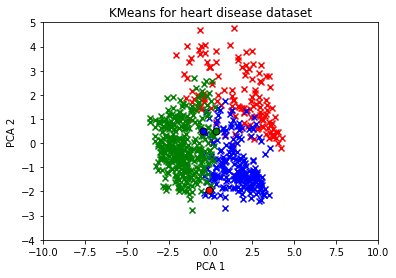

In [7]:
%matplotlib inline

labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plotting the results:
plt.figure

for l, c in zip([0,1,2], ['red', 'blue', 'green']):
    
    current_members = (labels == l)
    current_center = centers[l]
    
    plt.scatter(pca_result[current_members,0], pca_result[current_members,1], color = c, marker='x')
    plt.plot(current_center[0], current_center[1], 'o', markerfacecolor = c,
            markeredgecolor = 'k', markersize=7)
    
# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-10, 10])
plt.ylim([-4, 5])

# Labels, Title, Legend:
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans for heart disease dataset')

plt.show

### Here we see the scatter plot for the trained data

# Logistic Regression 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
my_logreg = LogisticRegression(max_iter=2000)
my_logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [9]:
y_predict_lr = my_logreg.predict(X_test)
y_predict_prob_log_r = my_logreg.predict_proba(X_test)
score_logreg = accuracy_score(y_test, y_predict_lr)

In [10]:
print(score_logreg)

0.8869565217391304


In [11]:
print(y_predict_prob_log_r)

[[0.42952573 0.57047427]
 [0.06103703 0.93896297]
 [0.80756328 0.19243672]
 [0.76560882 0.23439118]
 [0.905484   0.094516  ]
 [0.04731256 0.95268744]
 [0.02469753 0.97530247]
 [0.14218146 0.85781854]
 [0.90480197 0.09519803]
 [0.9193517  0.0806483 ]
 [0.97770097 0.02229903]
 [0.39110226 0.60889774]
 [0.96143729 0.03856271]
 [0.93944062 0.06055938]
 [0.77806018 0.22193982]
 [0.04730327 0.95269673]
 [0.98138559 0.01861441]
 [0.90252378 0.09747622]
 [0.96665341 0.03334659]
 [0.16330706 0.83669294]
 [0.09376291 0.90623709]
 [0.36880653 0.63119347]
 [0.94223853 0.05776147]
 [0.86530733 0.13469267]
 [0.00836054 0.99163946]
 [0.08595253 0.91404747]
 [0.98955233 0.01044767]
 [0.33147269 0.66852731]
 [0.06662319 0.93337681]
 [0.47230925 0.52769075]
 [0.01784224 0.98215776]
 [0.48229236 0.51770764]
 [0.07136907 0.92863093]
 [0.05971069 0.94028931]
 [0.14339427 0.85660573]
 [0.95878768 0.04121232]
 [0.02237368 0.97762632]
 [0.04762704 0.95237296]
 [0.01001445 0.98998555]
 [0.1989362  0.8010638 ]


In [12]:
print(y_predict_prob_log_r[:,1])

[0.57047427 0.93896297 0.19243672 0.23439118 0.094516   0.95268744
 0.97530247 0.85781854 0.09519803 0.0806483  0.02229903 0.60889774
 0.03856271 0.06055938 0.22193982 0.95269673 0.01861441 0.09747622
 0.03334659 0.83669294 0.90623709 0.63119347 0.05776147 0.13469267
 0.99163946 0.91404747 0.01044767 0.66852731 0.93337681 0.52769075
 0.98215776 0.51770764 0.92863093 0.94028931 0.85660573 0.04121232
 0.97762632 0.95237296 0.98998555 0.8010638  0.97820488 0.01807093
 0.65369705 0.85905811 0.76865711 0.94953812 0.90149025 0.93138442
 0.29871216 0.50764158 0.93982653 0.2753333  0.03319038 0.01742042
 0.02454298 0.14257229 0.92658391 0.77411363 0.02110478 0.98351106
 0.78700302 0.00934238 0.03532148 0.86310889 0.91943004 0.98170786
 0.49956226 0.9801193  0.03302055 0.00926687 0.95056681 0.57992356
 0.07721338 0.13778176 0.26283412 0.4706076  0.29191566 0.24866648
 0.0804097  0.956378   0.43092909 0.94116002 0.10326738 0.87870075
 0.97085829 0.59419001 0.06486668 0.01144914 0.10063995 0.9807

In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_log_r[:,1], pos_label=1)

In [14]:
print(fpr)

[0.         0.         0.         0.00952381 0.00952381 0.01904762
 0.01904762 0.02857143 0.02857143 0.03809524 0.03809524 0.04761905
 0.04761905 0.05714286 0.05714286 0.06666667 0.06666667 0.08571429
 0.08571429 0.0952381  0.0952381  0.1047619  0.1047619  0.11428571
 0.11428571 0.12380952 0.12380952 0.16190476 0.16190476 0.17142857
 0.17142857 0.18095238 0.18095238 0.2        0.2        0.26666667
 0.26666667 0.27619048 0.27619048 0.40952381 0.40952381 0.41904762
 0.41904762 0.67619048 0.67619048 0.68571429 0.68571429 1.        ]


In [15]:
print(tpr)

[0.    0.008 0.36  0.36  0.376 0.376 0.584 0.584 0.592 0.592 0.632 0.632
 0.704 0.704 0.736 0.736 0.792 0.792 0.808 0.808 0.824 0.824 0.832 0.832
 0.904 0.904 0.912 0.912 0.92  0.92  0.936 0.936 0.944 0.944 0.952 0.952
 0.96  0.96  0.968 0.968 0.976 0.976 0.984 0.984 0.992 0.992 1.    1.   ]


In [16]:
AUC = metrics.auc(fpr, tpr)

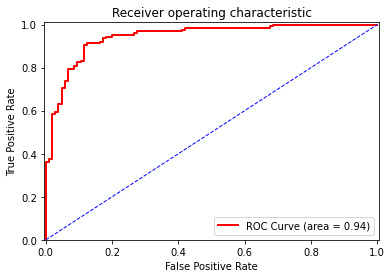

In [17]:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)


# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Decision Tree classifier

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 3)


In [19]:
my_decisiontree = DecisionTreeClassifier(random_state = 3)


In [20]:
my_decisiontree.fit(X_train, y_train)
y_predict_dt = my_decisiontree.predict(X_test)



In [21]:
score_dt = accuracy_score(y_test, y_predict_dt)
print(score_dt)

0.7950310559006211


# Random Forest

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)


In [23]:
rf = RandomForestClassifier(n_estimators=500,random_state=3)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=3)

This is one of my many decision trees from random forest


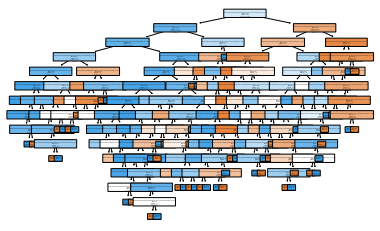

In [24]:
plot_tree(rf.estimators_[1], 
          feature_names= rf, 
          class_names= ['0','1'], 
          filled=True, 
          impurity=True, 
          rounded=True)

print('This is one of my many decision trees from random forest')



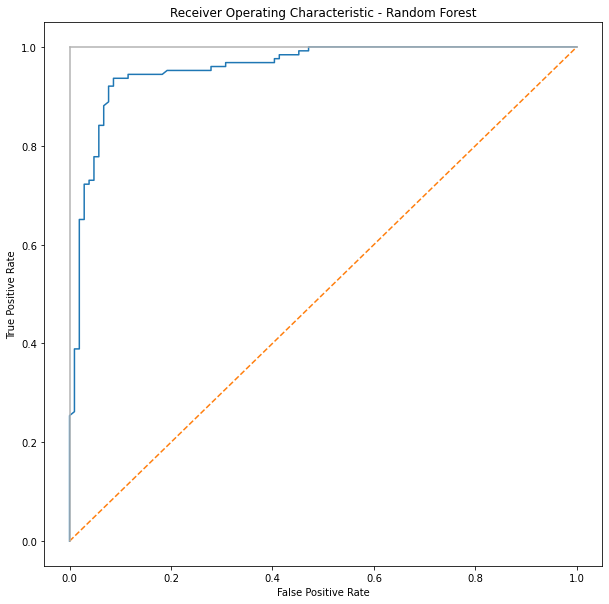

This is the accuracy score with random forest 0.9173913043478261
This is the area under curve 0.9574557387057387


In [25]:
y_score1 = rf.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

y_predict_RandomForest2 = rf.predict(X_test)
score_RandomForest2 = accuracy_score(y_test, y_predict_RandomForest2)
print("This is the accuracy score with random forest", score_RandomForest2)

# AUC:
AUC = metrics.auc(false_positive_rate1, true_positive_rate1)
print('This is the area under curve', AUC)

# Now we are going to use machine learning algorithm K-Nearest Neighbor to predict Heart Disease.

In [26]:
# The purpose of this project is to use machine learning algorithm K-Nearest Neighbor to predict Heart Disease.

# The following lines will import needed libraries.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

In [27]:
# Create a new data frame

df_he = hot_encoded_df

In [28]:
# Create our test data

X_all_train, X_all_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [29]:
# Instaniate our Nearest Neighbor Classifier with k = 3

k = 3
my_knn_3 = KNeighborsClassifier(n_neighbors = k)

In [30]:
# Train our machine

my_knn_3.fit(X_all_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
# Predict the value

y_predict = my_knn_3.predict(X_all_test)

In [32]:
# Check the predicted value versus actual

accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.8565217391304348


In [33]:
# Trying different k-values

klist = [1,3,5,7,11,13,15,16,17,19]
acclist = []

for k in klist:
    knn_i = KNeighborsClassifier(n_neighbors = k)
    knn_i.fit(X_all_train,y_train)
    y_predict = knn_i.predict(X_all_test)
    accuracy = accuracy_score(y_test, y_predict)
    acclist.append(accuracy)

print(acclist)

[0.808695652173913, 0.8565217391304348, 0.8652173913043478, 0.8608695652173913, 0.8956521739130435, 0.8869565217391304, 0.8869565217391304, 0.8782608695652174, 0.8739130434782608, 0.8608695652173913]


# Results

We can see that for k = 11 we get an accuracy of 89.56% which is greater than 85.653% when k = 3.
Therefore going ahead we will use k = 11 to test which features are the best features.

## Using the best k(k = 11) from klist to check which feature is the best feature.

In [34]:
feature_cols = ['Age']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1 = [19]
acclist1.append(accuracy)

0.6217391304347826


In [35]:
feature_cols = ['Male']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7


In [36]:
feature_cols = ['Female']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7


In [37]:
feature_cols = ['ATA']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7


In [38]:
feature_cols = ['ASY']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7608695652173914


In [39]:
feature_cols = ['TA']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5608695652173913


In [40]:
feature_cols = ['NAP']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.6565217391304348


In [41]:
feature_cols = ['RestingBP']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5478260869565217


In [42]:
feature_cols = ['Cholesterol']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1 = []
acclist1.append(accuracy)

0.5739130434782609


In [43]:
feature_cols = ['FastingBS']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.6043478260869565


In [44]:
feature_cols = ['Normal']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5782608695652174


In [45]:
feature_cols = ['ST']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5043478260869565


In [46]:
feature_cols = ['LVH']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5782608695652174


In [47]:
feature_cols = ['MaxHR']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.6652173913043479


In [48]:
feature_cols = ['ExerciseAngina']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7434782608695653


In [49]:
feature_cols = ['Oldpeak']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.6782608695652174


In [50]:
feature_cols = ['Up']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.8043478260869565


In [51]:
feature_cols = ['Flat']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7565217391304347


In [52]:
feature_cols = ['Down']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5782608695652174


## List the best features in order by accuracy:

1st 'Up'

2nd 'ASY'

3rd 'Flat'

4th 'ExerciseAngina'

5th (tie) 'Male' & 'Female' & 'ATA'

6th 'Oldpeak'

7th 'MaxHR'

8th 'NAP' 

9th 'Age'

10th 'FastingBS'

11th (tie) 'Normal' & 'LVH' & 'Down'

12th 'Cholesterol' 

13th 'TA'

14th 'RestingBP'

15th 'ST'

## Test the best combination of the top four features.

Now we are going to test which combination of the best features gives us the highest accuracy.

In [53]:
feature_cols = ['Up','ASY']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2 = []
acclist2.append(accuracy)

In [54]:
feature_cols = ['Up','Flat']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2.append(accuracy)

In [55]:
feature_cols = ['Up','ExerciseAngina']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2.append(accuracy)

In [56]:
feature_cols = ['ASY','Flat']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2.append(accuracy)

In [57]:
feature_cols = ['ASY','ExerciseAngina']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2.append(accuracy)

In [58]:
feature_cols = ['Flat','ExerciseAngina']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2.append(accuracy)

In [59]:
print(acclist2)

[0.8043478260869565, 0.8043478260869565, 0.8130434782608695, 0.808695652173913, 0.808695652173913, 0.808695652173913]


## 1st & 4th

We can see that the first and fourth best features being the ST_Slope = 'Up' and ExerciseAngina gives us the best accuracy. 

## Predicting the probalbility & showing the performance

In [60]:
# Instaniate our Nearest Neighbor Classifier with k = 11

k = 11
my_knn_11 = KNeighborsClassifier(n_neighbors = k)
my_knn_11.fit(X_all_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [61]:
# Predict the Probability

y_predict_proba_knn = my_knn_11.predict_proba(X_all_test)

In [62]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_proba_knn[:,1], pos_label = 1)

In [63]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.9251608402449423


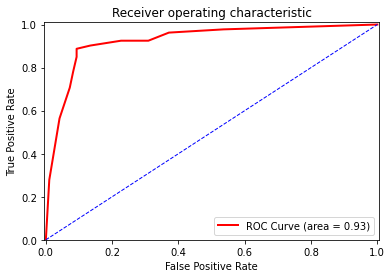

In [64]:
# Show the ROC

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")

plt.show()

As shown thanks to the graph above we can see that nearest neighbor has only a preformance rate of 92.51%. Therefore we can only say its reliable almost 93% of the time.

Start of LinearRegression Model:

In [65]:
from sklearn.linear_model import LinearRegression
feature_cols = ['Age','RestingBP','Cholesterol','FastingBS',
                'MaxHR','Oldpeak']
X = df[feature_cols]
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=3)
#creating new linear regression model
my_lin_reg = LinearRegression()
my_lin_reg.fit(X_train,y_train)

y_pred = my_lin_reg.predict(X_test)
print(y_pred)

[0.52223295 0.93414912 0.92231951 0.74827795 0.26635152 0.75857625
 1.18382503 0.63538766 0.18445595 0.45264088 0.50601304 0.35525527
 0.10782969 0.5161639  0.97510394 0.25383619 0.79251722 0.80090786
 0.61481136 0.4824058  0.46458135 0.70487153 1.23163613 0.47727843
 0.26259156 0.46916753 0.76149321 0.54559102 0.1315926  0.86485681
 1.00224239 0.46894389 0.84504013 0.30117328 0.31799957 0.22399485
 1.14595847 0.38037276 0.44279552 1.04847724 0.78321432 0.71934902
 0.25869139 0.74698929 0.29736602 0.88567021 0.6674022  0.3298803
 0.16541046 0.48217726 0.58644109 0.8268284  0.82081386 0.16519421
 0.5592906  0.64527229 0.29622488 0.20122643 0.69851636 0.59103069
 0.15193597 0.82635152 0.2778182  0.77165752 0.68837069 0.1458761
 0.47290406 1.03364261 0.34723298 0.68134066 0.29424482 0.28656035
 0.3374782  0.60463228 0.60316057 0.29940117 0.8257975  0.70461296
 0.20808463 0.41093733 1.13531513 0.53901094 0.88107528 0.62343803
 0.24921071 0.68869007 0.45323858 0.7142511  0.31848001 0.416118

In [66]:
from sklearn import metrics
#calculating mse
mse = metrics.mean_squared_error(y_test, y_pred)
mse

0.1512107862645914

In [67]:
#calculating rmse(accuracy score)
rmse = np.sqrt(mse)
print('Below is our accuracy score before applying One Hot Coding:')
print(rmse)
print('Unlike other methods we use RMSE as our accuracy score. The lower the number for RMSE the better.')

Below is our accuracy score before applying One Hot Coding:
0.3888583112967902
Unlike other methods we use RMSE as our accuracy score. The lower the number for RMSE the better.


Now this will be our rmse after one hot encoding:

In [68]:
feature_cols = ['Age', 'Male', 'Female', 'ATA', 'ASY', 'TA', 'NAP', 'RestingBP', 'Cholesterol', 'FastingBS', 
                'Normal', 'ST','LVH', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'Up','Flat','Down']
X = hot_encoded_df[feature_cols]
y = hot_encoded_df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=3)

linreg = LinearRegression()
linreg.fit(X_train,y_train)

y_prediction = linreg.predict(X_test)

print(y_prediction)

[ 0.8455563   0.85465754  0.85750671  0.94717267  0.14063674  1.02173233
  1.15038925  0.69823008  0.09286257  0.3087418   0.25374795  0.20564453
 -0.11040038  0.68307353  1.26395215 -0.08292784  0.98713524  0.91470444
  0.87630181  0.67072848  0.63408449  0.83934509  0.90500798  0.78728955
  0.32814957  0.85556589  0.87254762  0.29486629  0.0491408   1.11835697
  1.01848707  0.48291306  0.97342761 -0.08240757  0.49277294 -0.19765651
  1.10685352  0.06881551  0.83999787  0.51560441  0.95040042  1.04036908
  0.09841389  0.33575941 -0.05168825  0.83484311  0.69309591  0.35614916
  0.40930372  0.88769075  0.89020022  0.7847952   0.76106106 -0.08525512
  0.60162681  0.9393379  -0.05629599  0.2878524   0.9907888   0.52325966
 -0.08909645  0.72547662  0.10232384  1.00237206  0.57322956 -0.07856279
  0.14054839  0.87395252 -0.04863982  0.63038922  0.41308115 -0.09716582
 -0.08280713  0.88380742  0.443389   -0.13385028  1.0292324   0.90594329
  0.34318611  0.12022239  1.09200536  0.61415246  0

In [69]:
#calculating mse
OHC_mse = metrics.mean_squared_error(y_test, y_prediction)
OHC_mse

0.0878453087965088

In [70]:
#Calculating rmse
OHC_rmse = np.sqrt(mse)
print('RMSE for data frame with One Hot Coding:')
print(OHC_rmse)

RMSE for data frame with One Hot Coding:
0.3888583112967902


rmse score before and after One Hot Coding are the same.